In [5]:
import pandas as pd
import numpy as np

In [6]:
F1 =  pd.read_csv('D:/Documents/ml projects/PROJECT 1/datasets/customer_churn_dataset-testing-master.csv')

In [7]:
F1.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [8]:
F1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [9]:
F2 =  F1.drop(['CustomerID'],axis = 'columns')

In [10]:
F2.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
print(F2.columns)

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn'],
      dtype='object')


In [13]:
F2['Gender'] = le.fit_transform(F2['Gender'])
F2['Subscription Type'] = le.fit_transform(F2['Subscription Type'])
F2['Contract Length'] = le.fit_transform(F2['Contract Length'])

In [14]:
F2.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,0,25,14,4,27,0,1,598,9,1
1,41,0,28,28,7,13,2,1,584,20,0
2,47,1,27,10,2,29,1,0,757,21,0
3,35,1,9,12,5,17,1,2,232,18,0
4,53,0,58,24,9,2,2,0,533,18,0


In [15]:
F2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                64374 non-null  int64
 1   Gender             64374 non-null  int64
 2   Tenure             64374 non-null  int64
 3   Usage Frequency    64374 non-null  int64
 4   Support Calls      64374 non-null  int64
 5   Payment Delay      64374 non-null  int64
 6   Subscription Type  64374 non-null  int64
 7   Contract Length    64374 non-null  int64
 8   Total Spend        64374 non-null  int64
 9   Last Interaction   64374 non-null  int64
 10  Churn              64374 non-null  int64
dtypes: int64(11)
memory usage: 5.4 MB


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = F2.drop(['Churn'],axis = 'columns')
y = F2.Churn

In [18]:
X.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,22,0,25,14,4,27,0,1,598,9
1,41,0,28,28,7,13,2,1,584,20
2,47,1,27,10,2,29,1,0,757,21
3,35,1,9,12,5,17,1,2,232,18
4,53,0,58,24,9,2,2,0,533,18


In [19]:
y

0        1
1        0
2        0
3        0
4        0
        ..
64369    1
64370    1
64371    1
64372    1
64373    1
Name: Churn, Length: 64374, dtype: int64

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [21]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((51499, 10), (12875, 10), (51499,), (12875,))

In [22]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

In [23]:
reg.fit(X_train,y_train)

C:\Users\Rahul\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [24]:
reg.score(X_train,y_train)

0.8233946290219227

In [25]:
reg.predict(X_test)

array([0, 0, 1, ..., 1, 0, 0], shape=(12875,))

In [26]:
y_predicted = reg.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_predicted,y_test)

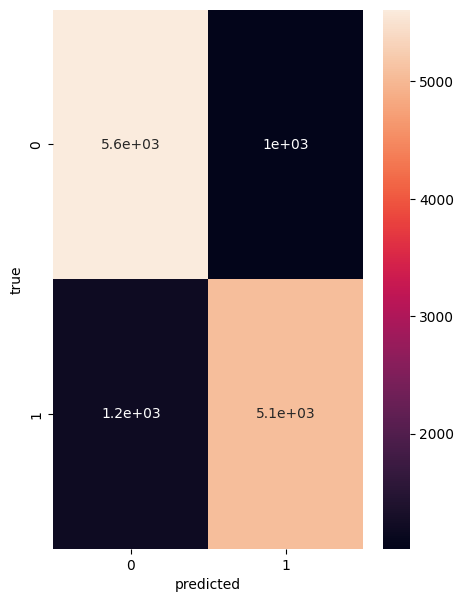

In [28]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (5,7))
sn.heatmap(cm,annot = True)
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()